## Prácticas Naive Bayes y KNN (ejercicio 3)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### **3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.**

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos

In [55]:
# from google.colab import files
import io
import pandas as pd
import numpy as np

# Carga de datos
# wine_data= '/content/drive/MyDrive/AI/SAA/data/wine_data.csv'

df_wine = pd.read_csv("data/winequality-red.csv")
df_wine.head()

# def upload_files ():
#   uploaded = files.upload()
#   for fn in uploaded.keys():
#     print('User uploaded file "{name}" with length {length} bytes'.format(
#         name=fn, length=len(uploaded[fn])))
#     df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
#     return df

# df_wine = upload_files()
# df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Comprobación tipo de datos y nulos

In [56]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [57]:
total_nulls = df_wine.isnull().sum()
total_nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4. Separamos datos

In [58]:
from sklearn.model_selection import train_test_split

# División el conjunto de datos en train y test en un porcentaje de 2/3 vs 1/3
wine_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

train, test = train_test_split(df_wine[wine_features], test_size=0.40)
train.reset_index(inplace = True)
test.reset_index(inplace = True)

### 5. Naive Bayes

In [62]:
# feature selection and transformation
from sklearn.naive_bayes import GaussianNB


X = train[wine_features]
y = train['quality']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predicción
score = model.score(X_test, y_test)

# Print the model's accuracy
print(f"GaussianNB => Precisión: {score:.2f}")


GaussianNB => Precisión: 1.00


### 6. KNN

Max Value uniform : 0.5129799301919721 (22)
Max Value distance : 0.5651232547993019 (29)


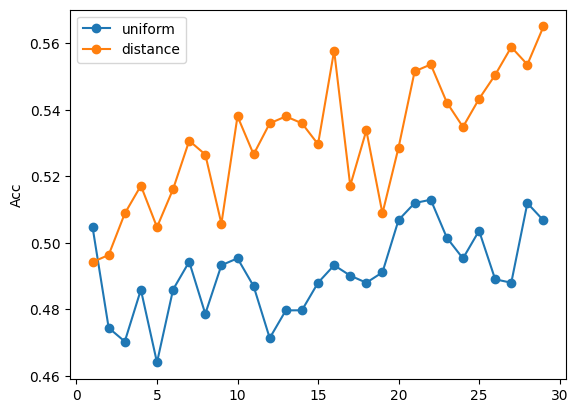

In [64]:
# Para saber si todos los vecinos influyen de la msima manera: parámetro weights. 
# Peso *uniform*: cada vecino tiene el mismo peso. / Peso *distance*: peso que aporta según distancia. Más lejos, menos peso

from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal

for i, weights in enumerate(['uniform', 'distance']): 

    total_scores = []
    
    for n_neighbors in range(1,30):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.loc[train_fold]
            f_test = train.loc[test_fold]
            # entrenamiento y ejecución del modelo
            
            knn.fit( X = f_train.drop(['quality'], axis=1),
                            y = f_train['quality'])
            y_pred = knn.predict(X = f_test.drop(['quality'], axis = 1))
            
            # evaluación del modelo
            acc = accuracy_score(f_test['quality'], y_pred)
            fold_accuracy.append(acc)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
        
    plt.plot(range(1,len(total_scores)+1), total_scores, marker='o', label=weights)
    
    print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
    
    plt.ylabel('Acc')

plt.legend()
plt.show()

In [66]:
# Seleccionamos la mejor parametrización obtenida para construir el modelo

n_neighbors = 29
weights = 'distance' # Parámetro que informa si todos los vecinos influyen o no de la misma forma
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)
# fit and predict
knn.fit(X = train[wine_features], y = train['quality'])
y_pred = knn.predict(X = test[wine_features])
acc = accuracy_score(test['quality'], y_pred)
print ('Acc', acc)

Acc 0.6671875
